# World happiness Project

By Rushda Shabbir

Batch - DS2405


# Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

#What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

#What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

# What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

#You need to predict the happiness score considering all the other factors mentioned in the dataset.

Dataset Link-
https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv 



In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.shape

(158, 12)

# EDA Exploratory Data Analysis

In [4]:
# checking the dimension of the dataset
df.shape

print(f"The rows and columns in the dataset: {df.shape}")
print(f"\nThe column headers in the dataset: {df.columns}")

The rows and columns in the dataset: (158, 12)

The column headers in the dataset: Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')


In [5]:
# checking the types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

# comments

There are three different types of data (int64, float, and object) present in the dataset.

happiness_rank: int64
Happiness Score, Standard Error, Economy (GDP per Capita), Family, Health (Life Expectancy) , freedom, Trust (Government Corruption), generosity, Dystopia Residual: float64
country, region: object->String

The data set doesn't have null values.


In [6]:
# converting data into float
df['Happiness Rank']=df['Happiness Rank'].astype(float)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    float64
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(10), object(2)
memory usage: 14.9+ KB


In [8]:
# lets rename the columns for simplicity
df.columns = ['country',
             'region',
             'happiness_rank',
             'score',
             'standard_error',
             'gdp_per_capita',
             'family',
             'health',
             'freedom',
             'government_trust',
             'generosity',
             'dystopia_residual']
df.head()

,country,region,happiness_rank,score,standard_error,gdp_per_capita,family,health,freedom,government_trust,generosity,dystopia_residual
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [9]:
df.columns.tolist()

['country',
 'region',
 'happiness_rank',
 'score',
 'standard_error',
 'gdp_per_capita',
 'family',
 'health',
 'freedom',
 'government_trust',
 'generosity',
 'dystopia_residual']

In [10]:
#checking missing values
df.isnull().sum()

country              0
region               0
happiness_rank       0
score                0
standard_error       0
gdp_per_capita       0
family               0
health               0
freedom              0
government_trust     0
generosity           0
dystopia_residual    0
dtype: int64

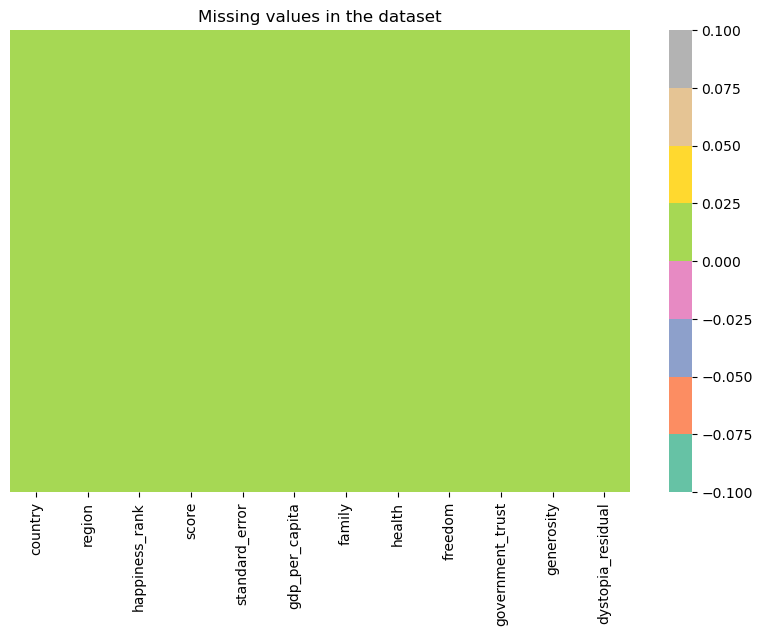

In [11]:
# Let's visualize by using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Set2')
plt.title('Missing values in the dataset', fontsize=12);

# Features Analysis
Unique values

In [12]:
udf = df.nunique().to_frame()
udf['type'] = df.dtypes.values
udf

,0,type
country,158,object
region,10,object
happiness_rank,157,float64
score,157,float64
standard_error,153,float64
gdp_per_capita,158,float64
family,158,float64
health,157,float64
freedom,158,float64
government_trust,157,float64


# comments'
All columns have unique values in almost all their rows, that is, 158 values that correspond to the 158 rows of the dataset. Except for the region column which only presents 10 unique values.

In [13]:
df['region'].value_counts()

region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64

In [14]:
df

,country,region,happiness_rank,score,standard_error,gdp_per_capita,family,health,freedom,government_trust,generosity,dystopia_residual
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154.0,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155.0,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156.0,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157.0,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [15]:
df['score'].value_counts()

score
5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: count, Length: 157, dtype: int64

In [16]:
df['score'].nunique()


157

# comments
1. The target variable is "score".the target value is continuous we have to do a regression analysis.
2. The country feature is an identifier for each record. Therefore, we are not going to use it in the predictive model.
   region is the only categorical feature in the dataset.
3. standard_error, gdp_per_capita, family, health, freedom, government_trust, generosity and systopia_residual are 
   numerical continuous features and will be analyzed later.
4. region is the only categorical feature in the dataset and country also.

# Summary statistics of the numerical variables

In [17]:
stats = df.describe()
stats

,happiness_rank,score,standard_error,gdp_per_capita,family,health,freedom,government_trust,generosity,dystopia_residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [18]:
# summary of the Non Numerical columns
df.describe(exclude=[np.number])

,country,region
count,158,158
unique,158,10
top,Switzerland,Sub-Saharan Africa
freq,1,40


Observations:

1. This give the statistical information of the numerical columns. The summary of the dataset looks perfect since there is not negative/invalid values present.
2. The counts of all the columns are same which means there are no missing values in the dataset.
3. The mean value is slightly larger than the median(50%) in columns {score, government_trust, generosity, standar_error, and dystopia_residual}, which means the data is skewed to right in these column.
4. The data in the columns {health, gdp_per_capita, family, freedom, and happines_rank} have a small difference between the mean value less than the median which means the data is skewed to left.
5. The dataset could present outliers in the columns {dytopia_residual, generosity, government_trust, and gdp_per_capita}, however in the univariate analysis of each feature we will verify it.
6. The minimum value in score is 2.839 and the maximum value is 7.587, and the mean is 5.37.



In [19]:
# Contrast the mean with the 50th percentile
(stats.loc['mean',:] - stats.loc['50%',:]).sort_values(ascending=False)

score                0.143234
government_trust     0.036202
generosity           0.021166
standard_error       0.003945
dystopia_residual    0.003562
happiness_rank      -0.006329
freedom             -0.006900
family              -0.038464
gdp_per_capita      -0.064108
health              -0.066446
dtype: float64

# Duplicates

In [20]:
# Searching for duplicated values
df[df.duplicated()].shape # here no duplicates

(0, 12)

In [21]:
# Separating Numerical and Categorical columns

# Numerical and Categorical columns
cat_col = []
num_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        cat_col.append(i)
    else:
        num_col.append(i)
print(f"Categorical Columns: {cat_col}")
print(f"Numerical Columns: {num_col}")
     

Categorical Columns: ['country', 'region']
Numerical Columns: ['happiness_rank', 'score', 'standard_error', 'gdp_per_capita', 'family', 'health', 'freedom', 'government_trust', 'generosity', 'dystopia_residual']


In [22]:
Happy_df = df[df.columns[2:]]
Happy_df

,happiness_rank,score,standard_error,gdp_per_capita,family,health,freedom,government_trust,generosity,dystopia_residual
0,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154.0,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155.0,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156.0,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157.0,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [23]:
Happy_df.shape

(158, 10)

# Data Visualization
Univariate Analysis on target Feature

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distplot
Skewness detection using distplot and skew()

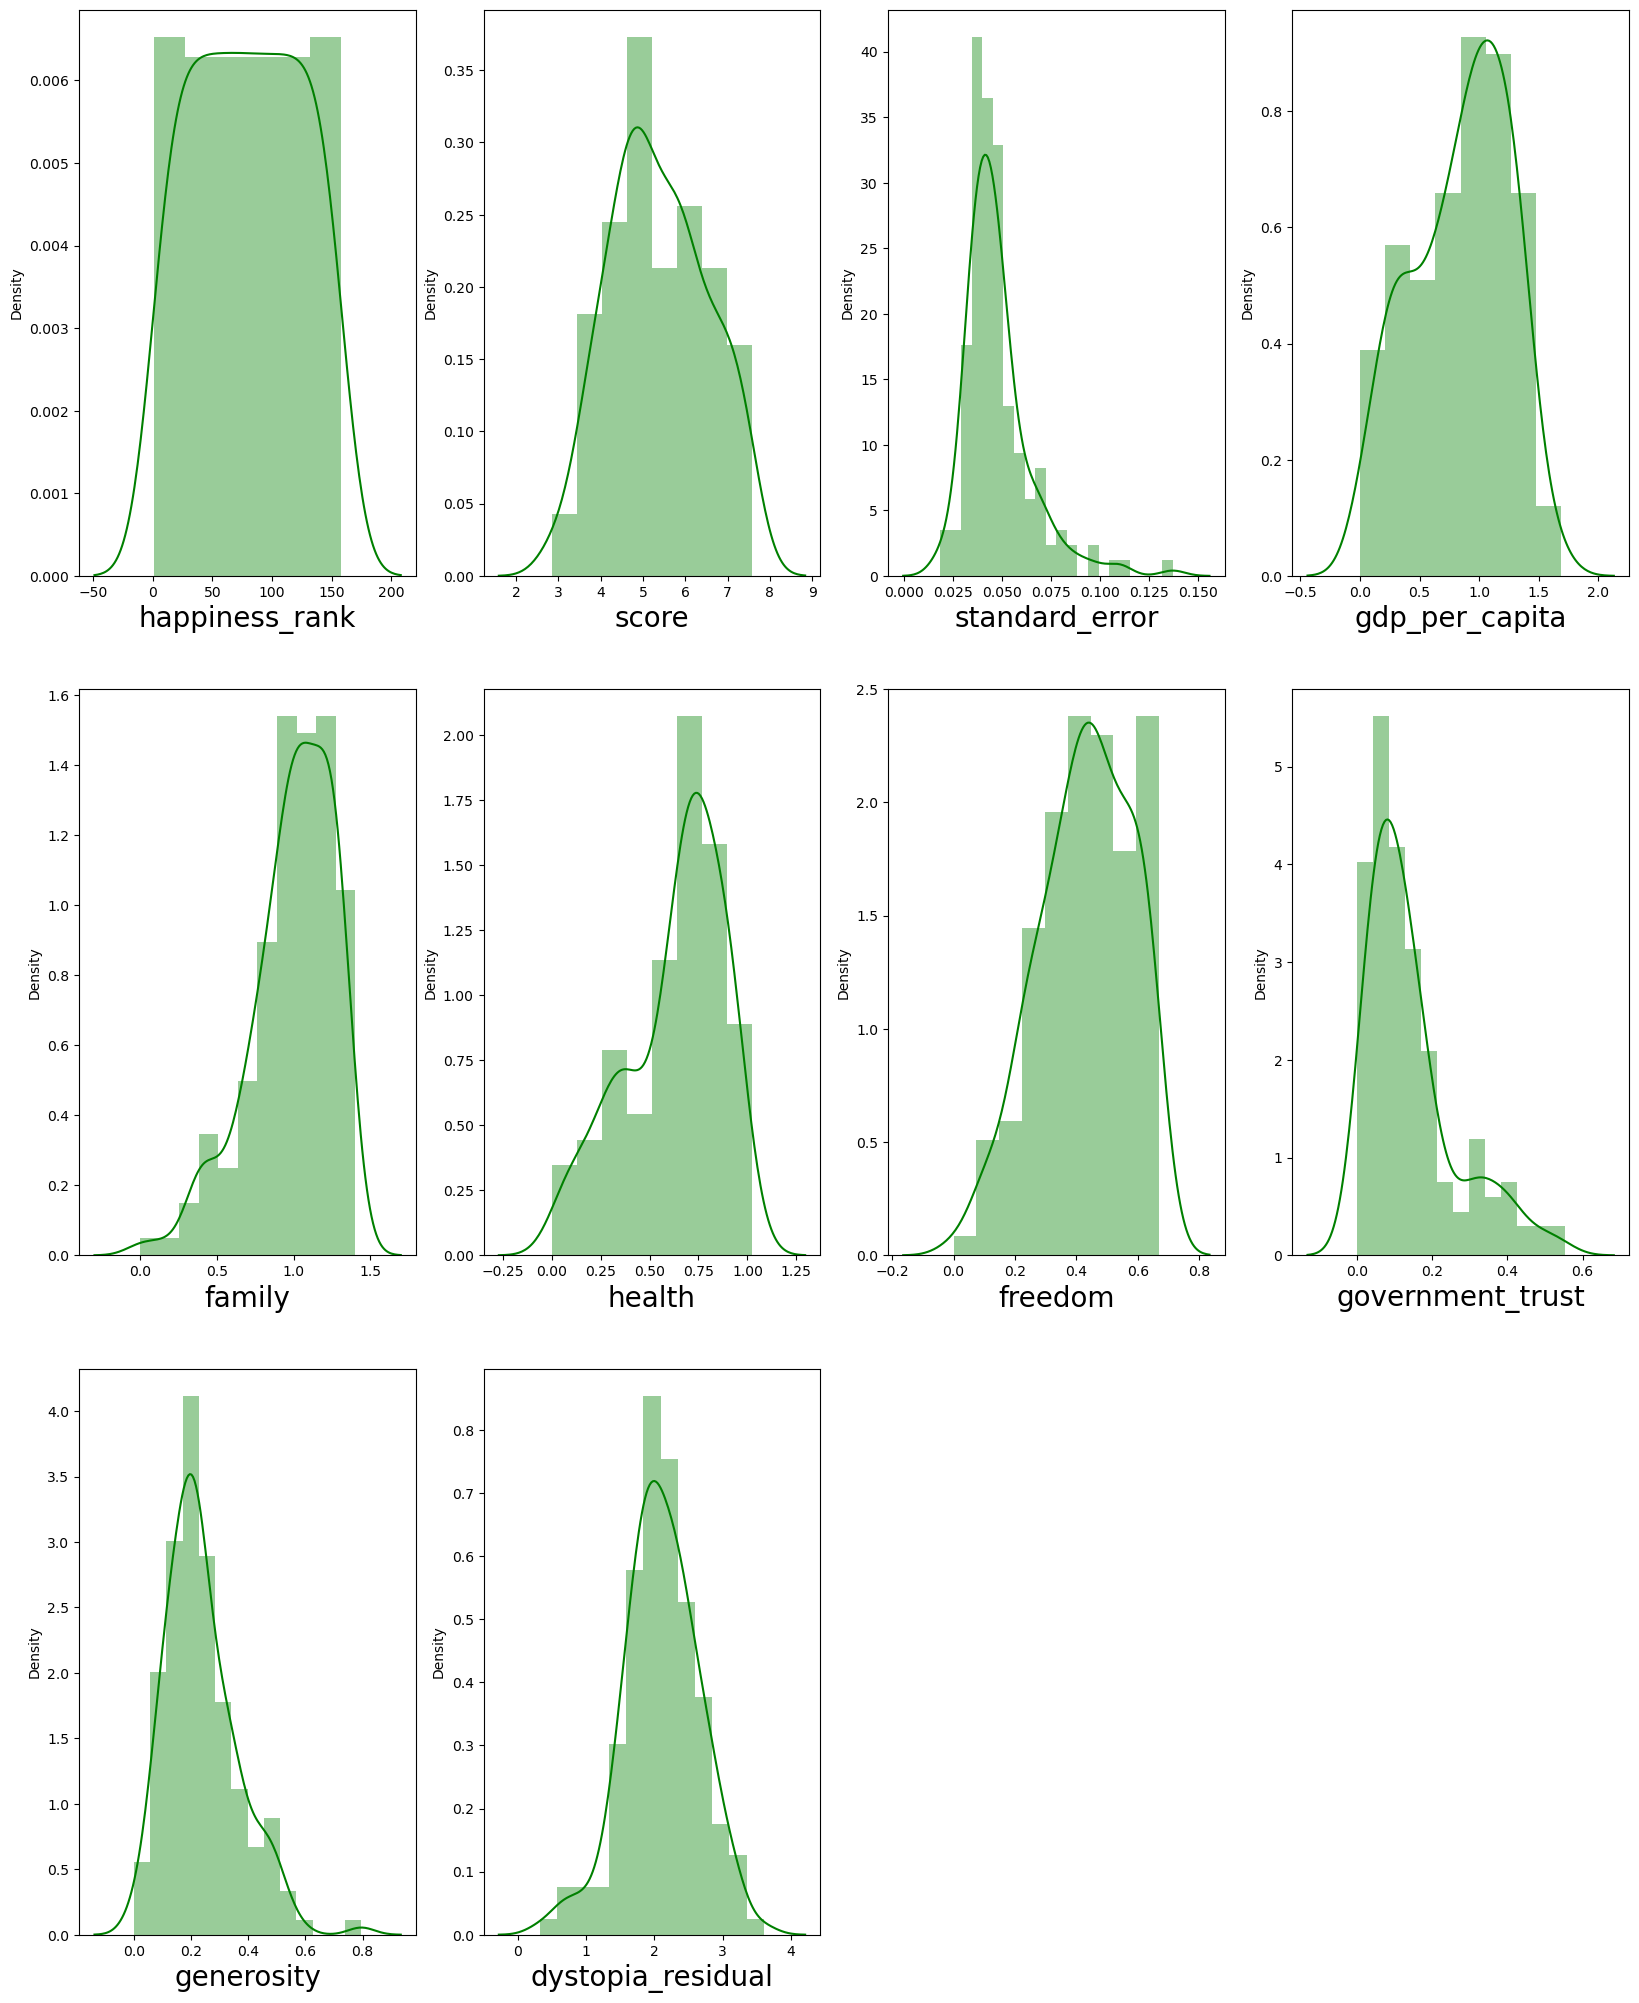

In [25]:
# check data distribution in each ciolumns
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in Happy_df:
    if plotnumber <=10:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(Happy_df[column], color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# comments

1. The columns {standard_error, government_trust, generosity } are little skewed to the right. If necessary later we will 
   transform the data to obtain a normal distribution that will allow me to improve the predictive model.
2. The columns {family, health} are skewed to the left.
3. The data almost looks normal in {score,freedom,happiness_rank, gdp_per_capita, dystopia_residual}.

# Histplot

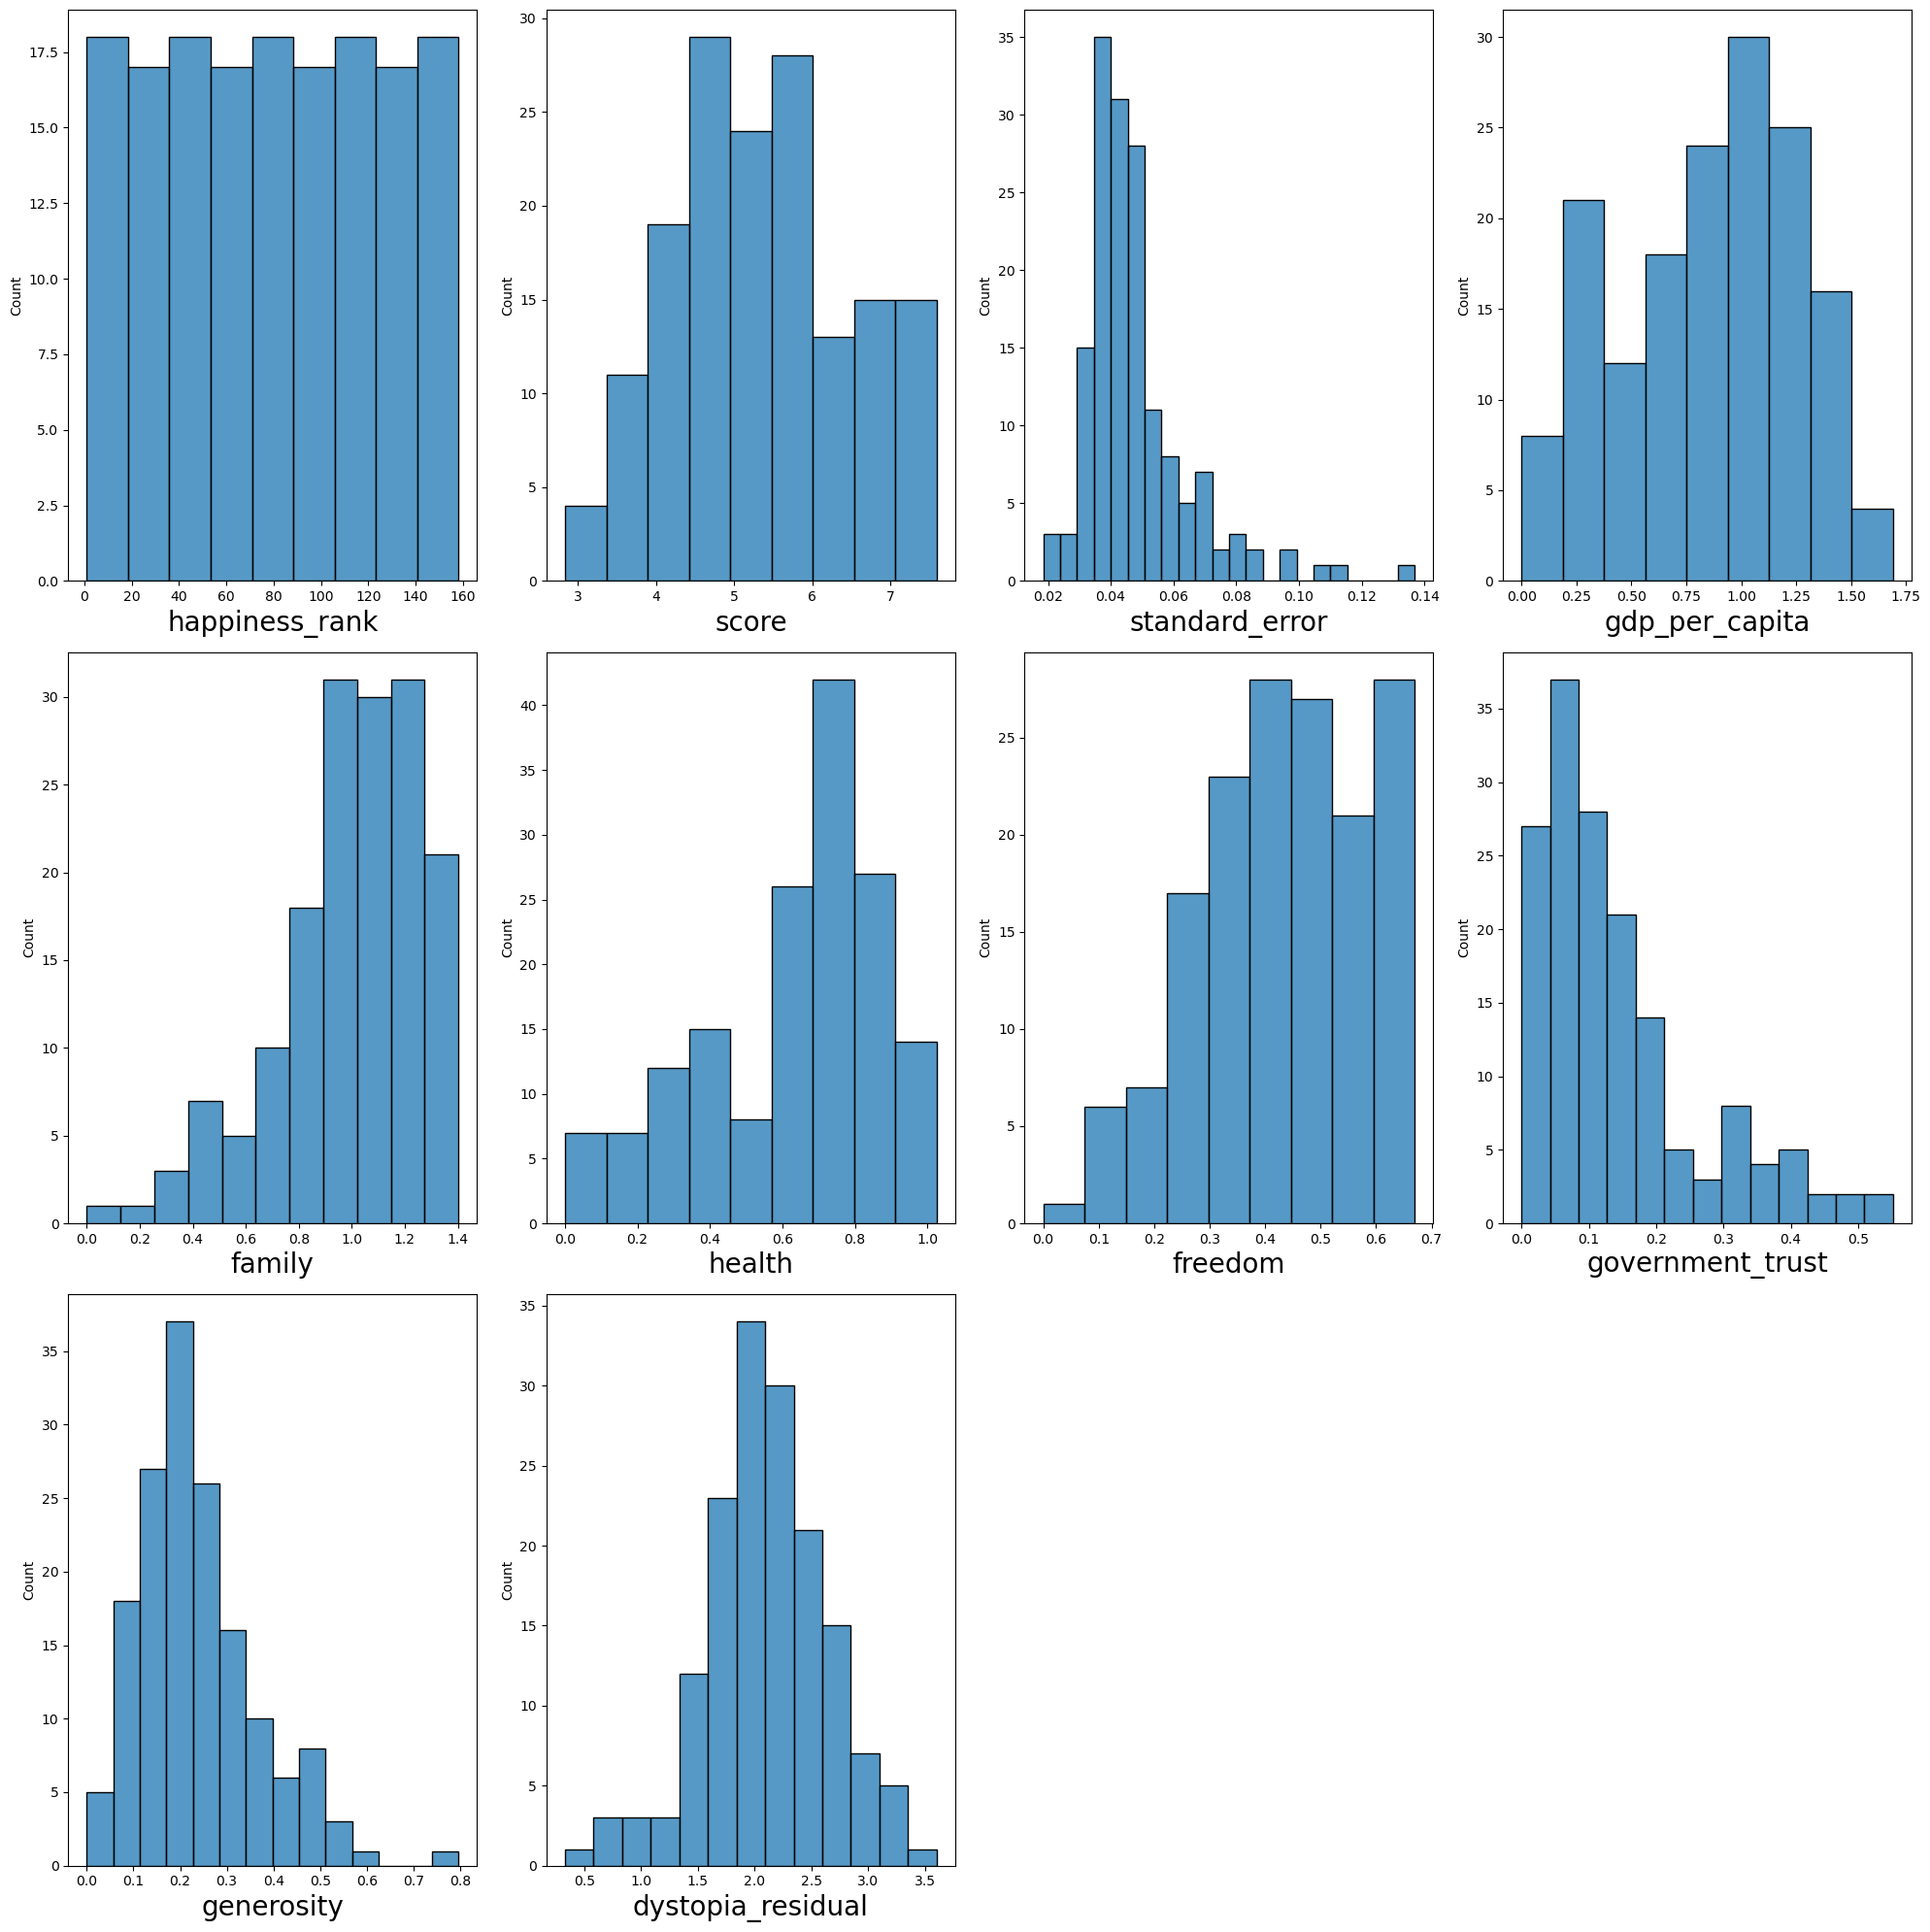

In [26]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
for column in Happy_df:
    if plotnumber <=10:
        ax = plt.subplot(3,4,plotnumber)
        sns.histplot(Happy_df[column], palette='Rainbow' )
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

# checking outliers

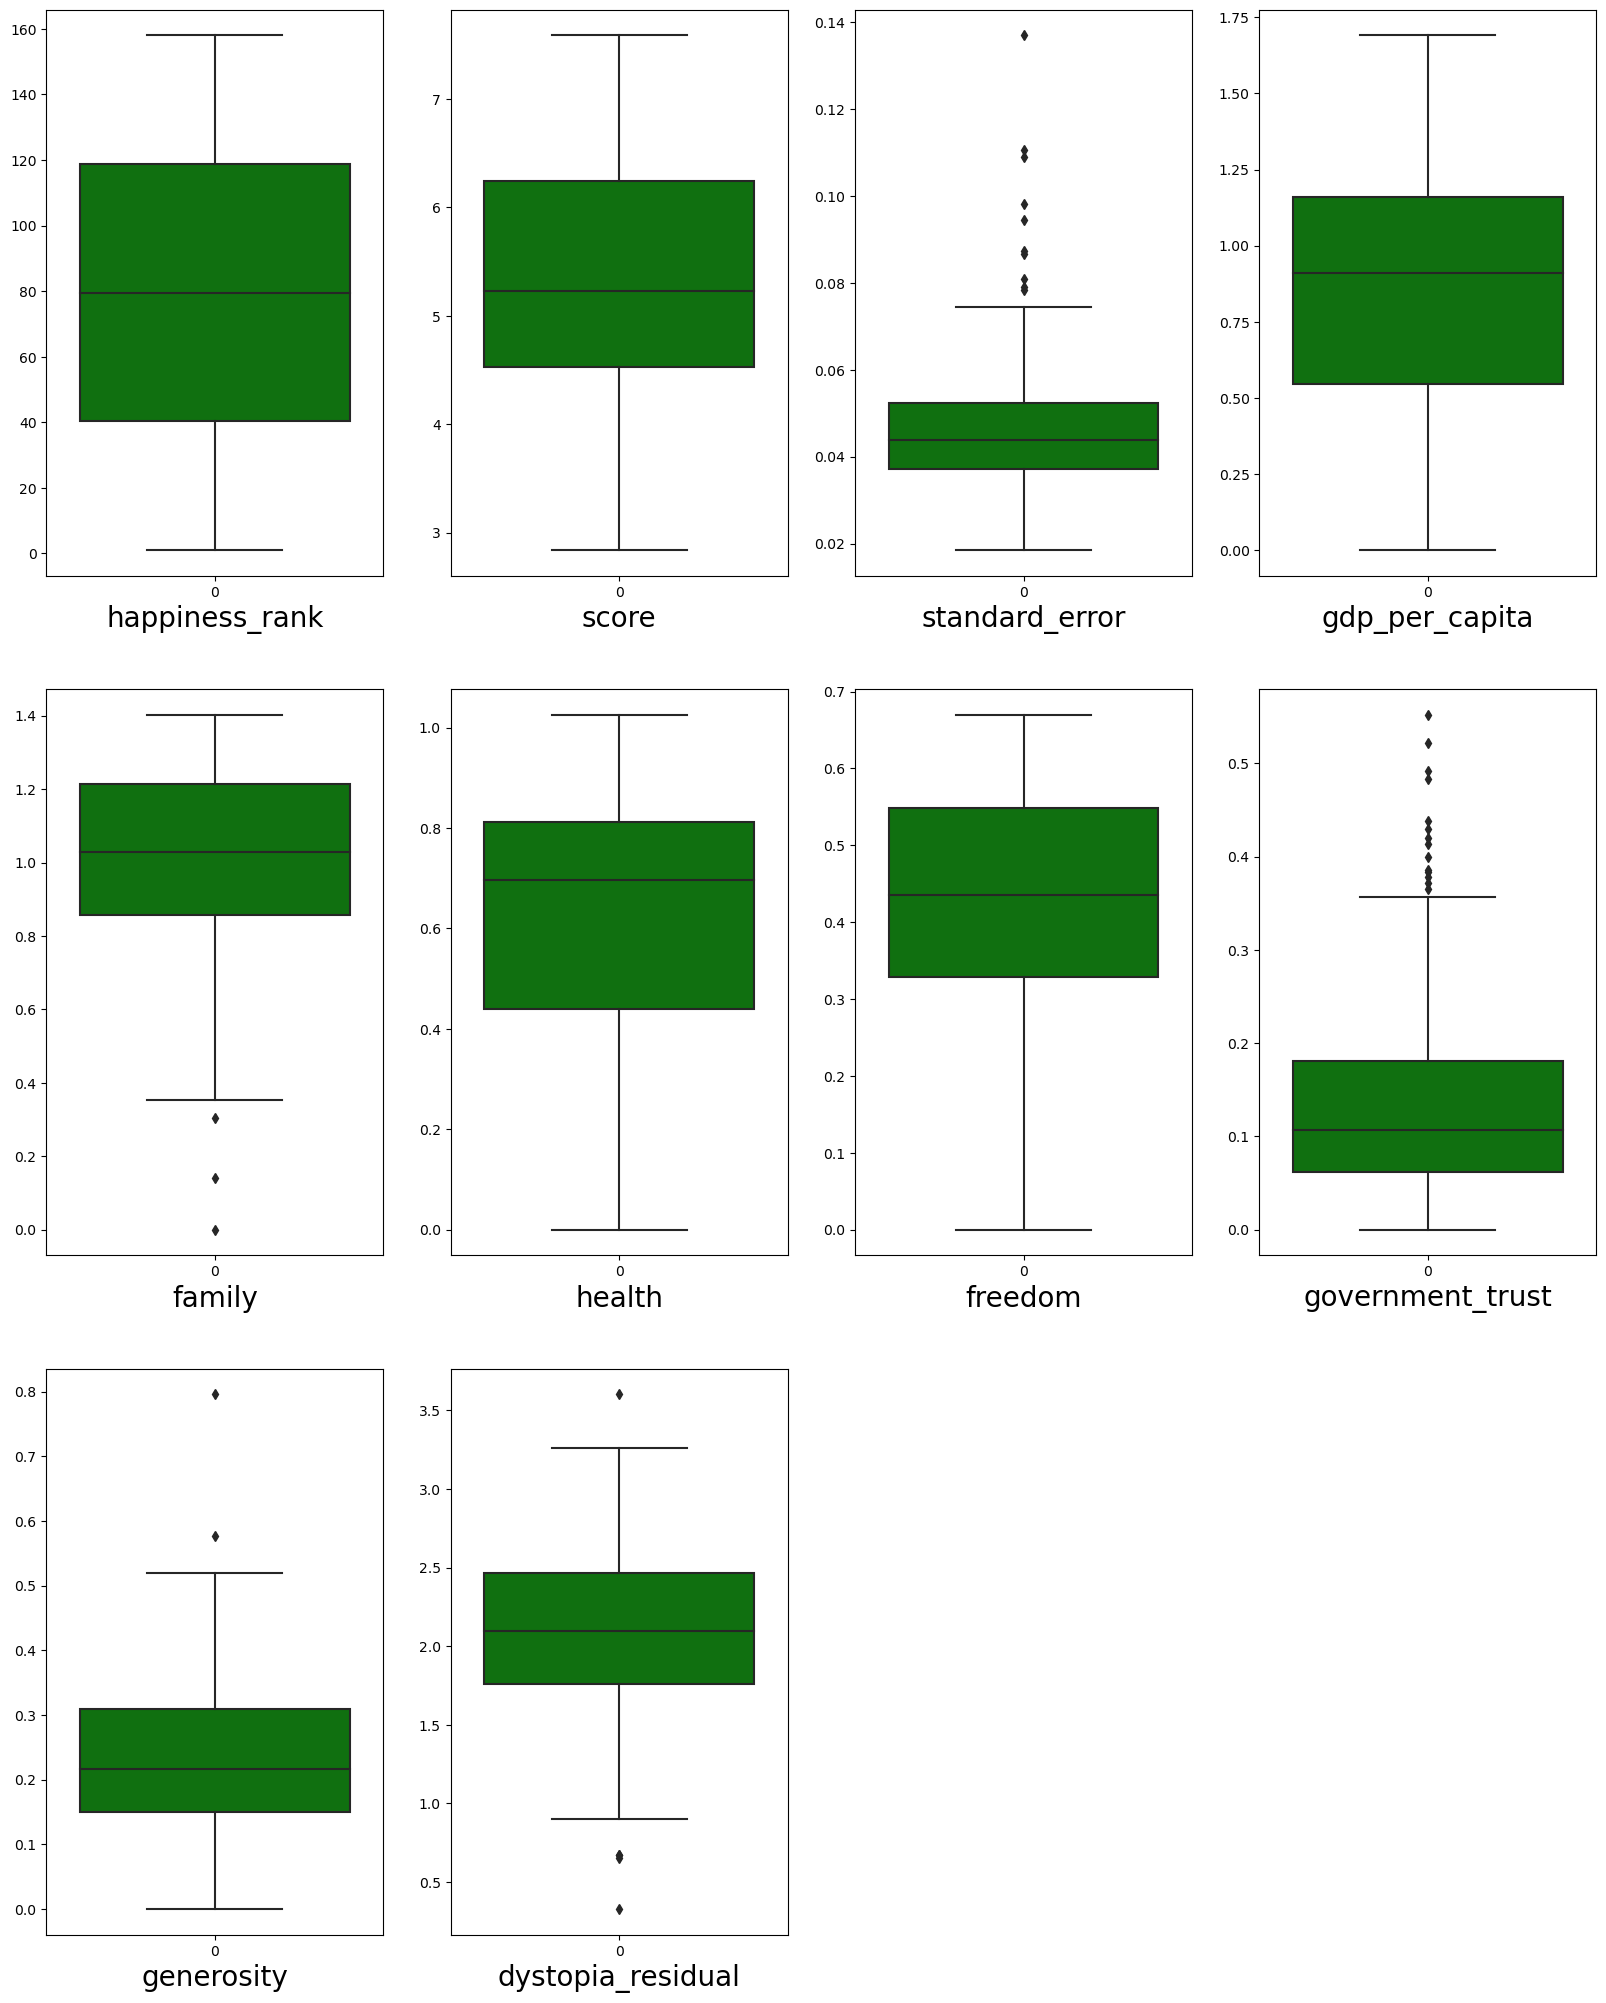

In [27]:
# check outliers by boxplot
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in Happy_df:
    if plotnumber <=10:
        ax = plt.subplot(3,4,plotnumber)
        sns.boxplot(Happy_df[column], color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Multivariate Analysis

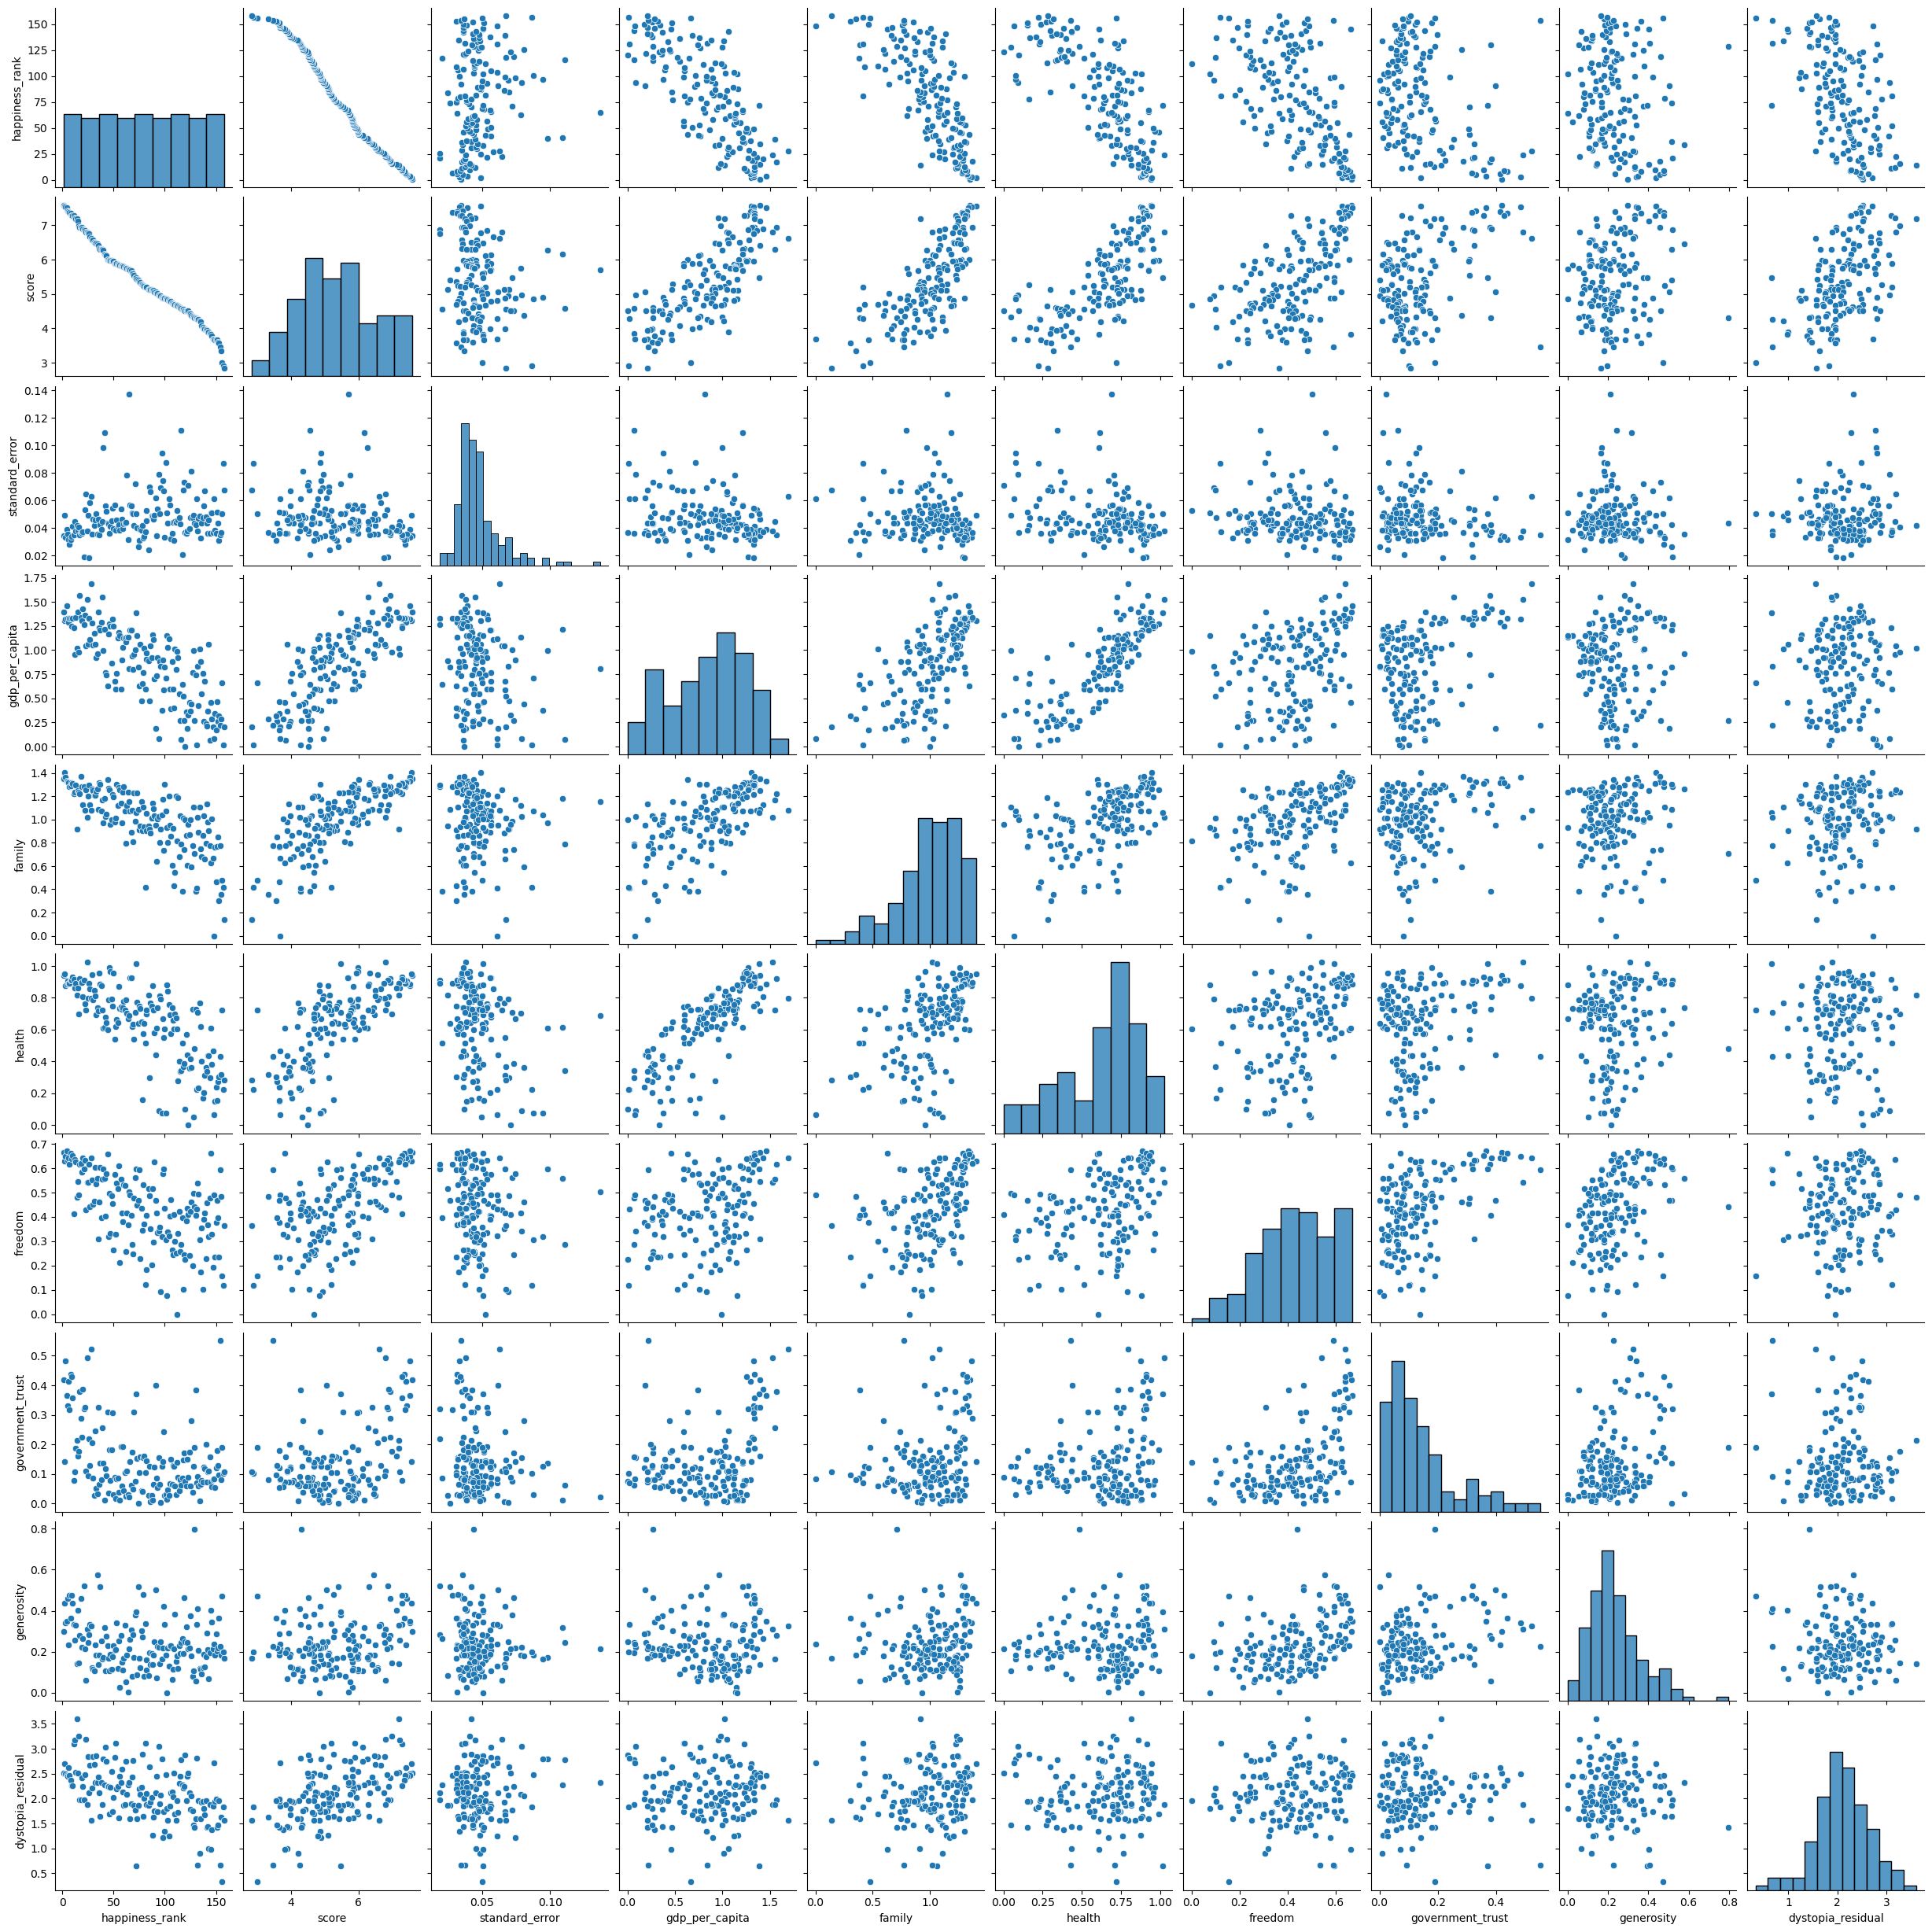

In [28]:
sns.pairplot(Happy_df , palette='viridis')

# Remove skewnes

In [29]:
Happy_df.skew()

happiness_rank       0.000418
score                0.097769
standard_error       1.983439
gdp_per_capita      -0.317575
family              -1.006893
health              -0.705328
freedom             -0.413462
government_trust     1.385463
generosity           1.001961
dystopia_residual   -0.238911
dtype: float64

# commemnts
We can see that....Positive Skew: In standard_error, government_trust, generosity
Negative Skew: In gdp_per_capita, family, health, freedom, dystopia_residual
here Data may need transformations to normalize it if necessary for certain statistical analyses.

# Region column (Categorical)

In [30]:
# Summarize the data
region_freq = df['region'].value_counts().to_frame()
region_freq

,count
region,
Sub-Saharan Africa,40
Central and Eastern Europe,29
Latin America and Caribbean,22
Western Europe,21
Middle East and Northern Africa,20
Southeastern Asia,9
Southern Asia,7
Eastern Asia,6
North America,2


Text(0.5, 1.05, 'Region Distribution')

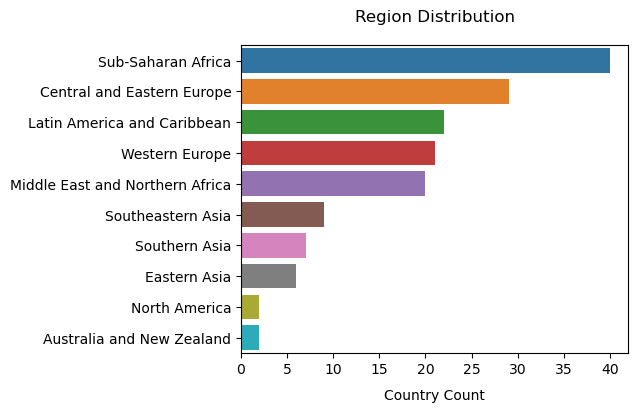

In [31]:
# Visualize the frequency of region in the dataset
plt.figure(figsize=(5, 4))

# Sort regions by amount of data in descending order
order = df['region'].value_counts().index

ax = sns.countplot(y='region', data=df, orient='v', order=order)

plt.ylabel('', size=10, labelpad=8)
plt.xlabel('Country Count', size=10, labelpad=8)
plt.title('Region Distribution', size=12, y=1.05)

In [32]:
# Selecting the top 10 countries by the happiness_rank
top_10_countries = df.sort_values(by='happiness_rank').head(10)
top_10_countries

,country,region,happiness_rank,score,standard_error,gdp_per_capita,family,health,freedom,government_trust,generosity,dystopia_residual
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6.0,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7.0,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8.0,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9.0,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10.0,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


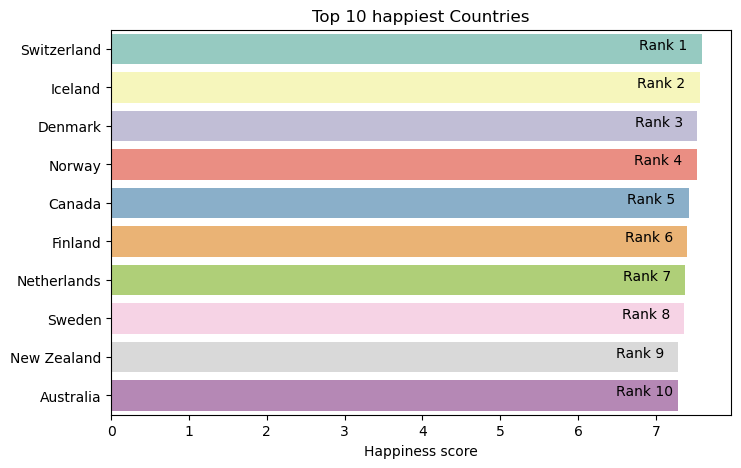

In [33]:
# Visualize the top 10 countries
plt.figure(figsize=(8, 5))
sns.barplot(x='score', y='country', data=top_10_countries, palette='Set3')

# Add rank information 
for i, (score, country) in enumerate(zip(top_10_countries['score'], top_10_countries['country']), start=1):
    plt.text(score - 0.8, i - 1, f'Rank {i}', fontsize=10, color='black')

plt.xlabel('Happiness score', fontsize=10)
plt.ylabel('', fontsize=12)
plt.title('Top 10 happiest Countries', fontsize=12)

plt.show()

In [34]:
# Selecting the top 10 countries by the happiness_rank
bottom_10_countries = df.sort_values(by='happiness_rank', ascending=False).head(10)
bottom_10_countries

,country,region,happiness_rank,score,standard_error,gdp_per_capita,family,health,freedom,government_trust,generosity,dystopia_residual
157,Togo,Sub-Saharan Africa,158.0,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
156,Burundi,Sub-Saharan Africa,157.0,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
155,Syria,Middle East and Northern Africa,156.0,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
154,Benin,Sub-Saharan Africa,155.0,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
153,Rwanda,Sub-Saharan Africa,154.0,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
152,Afghanistan,Southern Asia,153.0,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
151,Burkina Faso,Sub-Saharan Africa,152.0,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
150,Ivory Coast,Sub-Saharan Africa,151.0,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
149,Guinea,Sub-Saharan Africa,150.0,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
148,Chad,Sub-Saharan Africa,149.0,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296


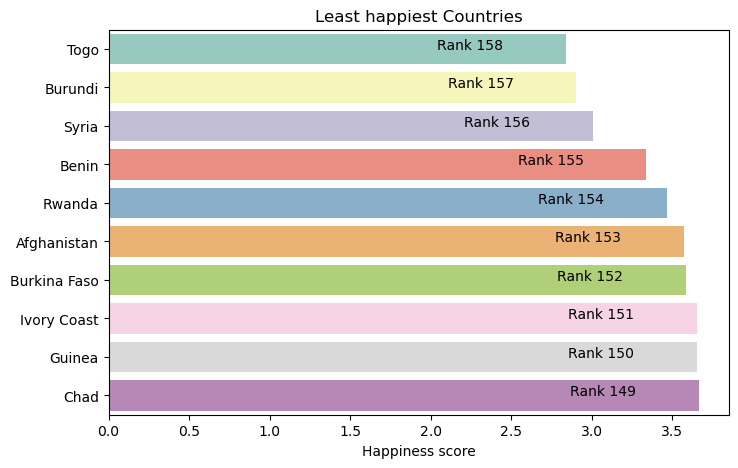

In [35]:
# Visualize the bottom 10 countries
plt.figure(figsize=(8, 5))
sns.barplot(x='score', y='country', data=bottom_10_countries, palette='Set3')

# Add rank information 
for i, (score, country) in enumerate(zip(bottom_10_countries['score'], bottom_10_countries['country']), start=1):
    plt.text(score - 0.8, i - 1, f'Rank {159-i}', fontsize=10, color='black')

plt.xlabel('Happiness score', fontsize=10)
plt.ylabel('', fontsize=12)
plt.title('Least happiest Countries', fontsize=12)

plt.show()

We can observe the 10 happiest and 10 least happiest countries.

# Encoding categorical columns

In [36]:
# Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

df['region'] = OE.fit_transform(df['region'].values.reshape(-1, 1))

In [37]:
df

,country,region,happiness_rank,score,standard_error,gdp_per_capita,family,health,freedom,government_trust,generosity,dystopia_residual
0,Switzerland,9.0,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,9.0,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,9.0,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,9.0,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5.0,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,8.0,154.0,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,8.0,155.0,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,4.0,156.0,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,8.0,157.0,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# reduce skewness

In [38]:
#so we have to reduce the skewness by using power transform
from sklearn.preprocessing import power_transform

In [39]:
x = df.drop(['country', 'score'], axis = 1)
y = df['score']

df_new = power_transform(x)
df_new = pd.DataFrame(df_new, columns = x.columns)
df_new.skew()

region              -0.228041
happiness_rank      -0.264365
standard_error      -0.020092
gdp_per_capita      -0.127233
family              -0.169651
health              -0.183181
freedom             -0.080728
government_trust     0.185965
generosity           0.013320
dystopia_residual    0.022925
dtype: float64

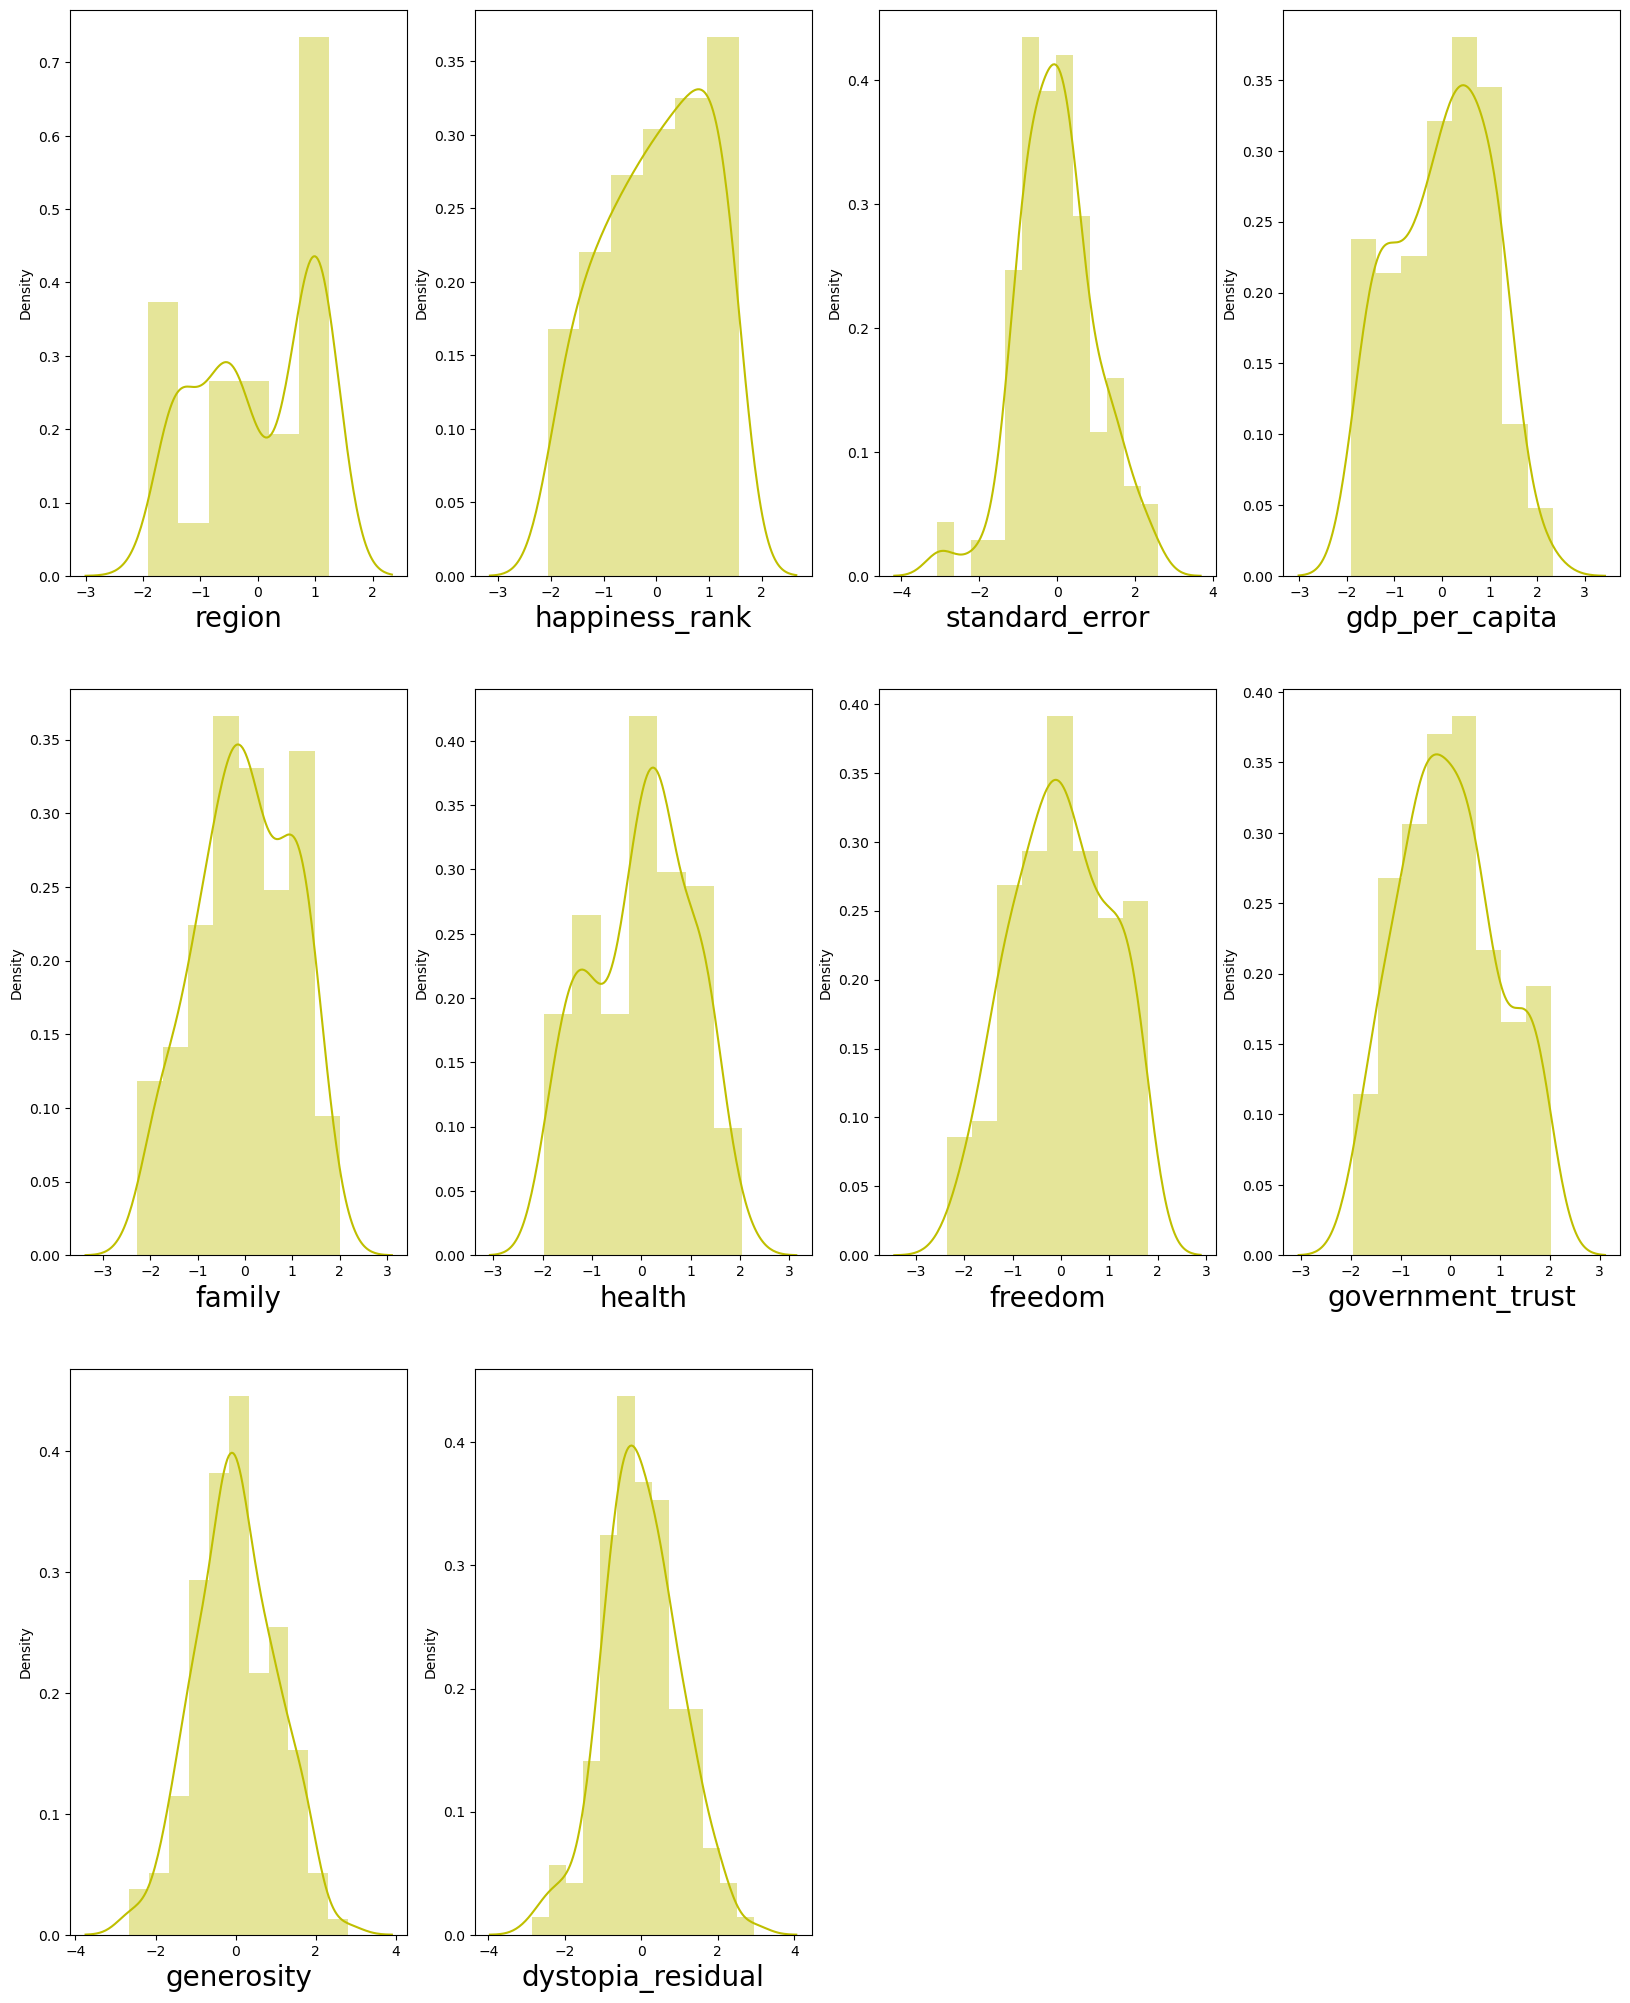

In [40]:
# Again check data distribution in each ciolumns
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df_new:
    if plotnumber <=10:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df_new[column], color='y')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# comments
now data looks normaly distributed

In [41]:
df1=df.drop('country',axis=1)
df1

,region,happiness_rank,score,standard_error,gdp_per_capita,family,health,freedom,government_trust,generosity,dystopia_residual
0,9.0,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9.0,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9.0,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9.0,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5.0,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,8.0,154.0,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,8.0,155.0,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,4.0,156.0,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,8.0,157.0,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Investingating Correlation between features

In [42]:
df1.corr()

,region,happiness_rank,score,standard_error,gdp_per_capita,family,health,freedom,government_trust,generosity,dystopia_residual
region,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
happiness_rank,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
score,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
standard_error,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
gdp_per_capita,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
family,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
health,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
freedom,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
government_trust,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
generosity,0.273557,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301


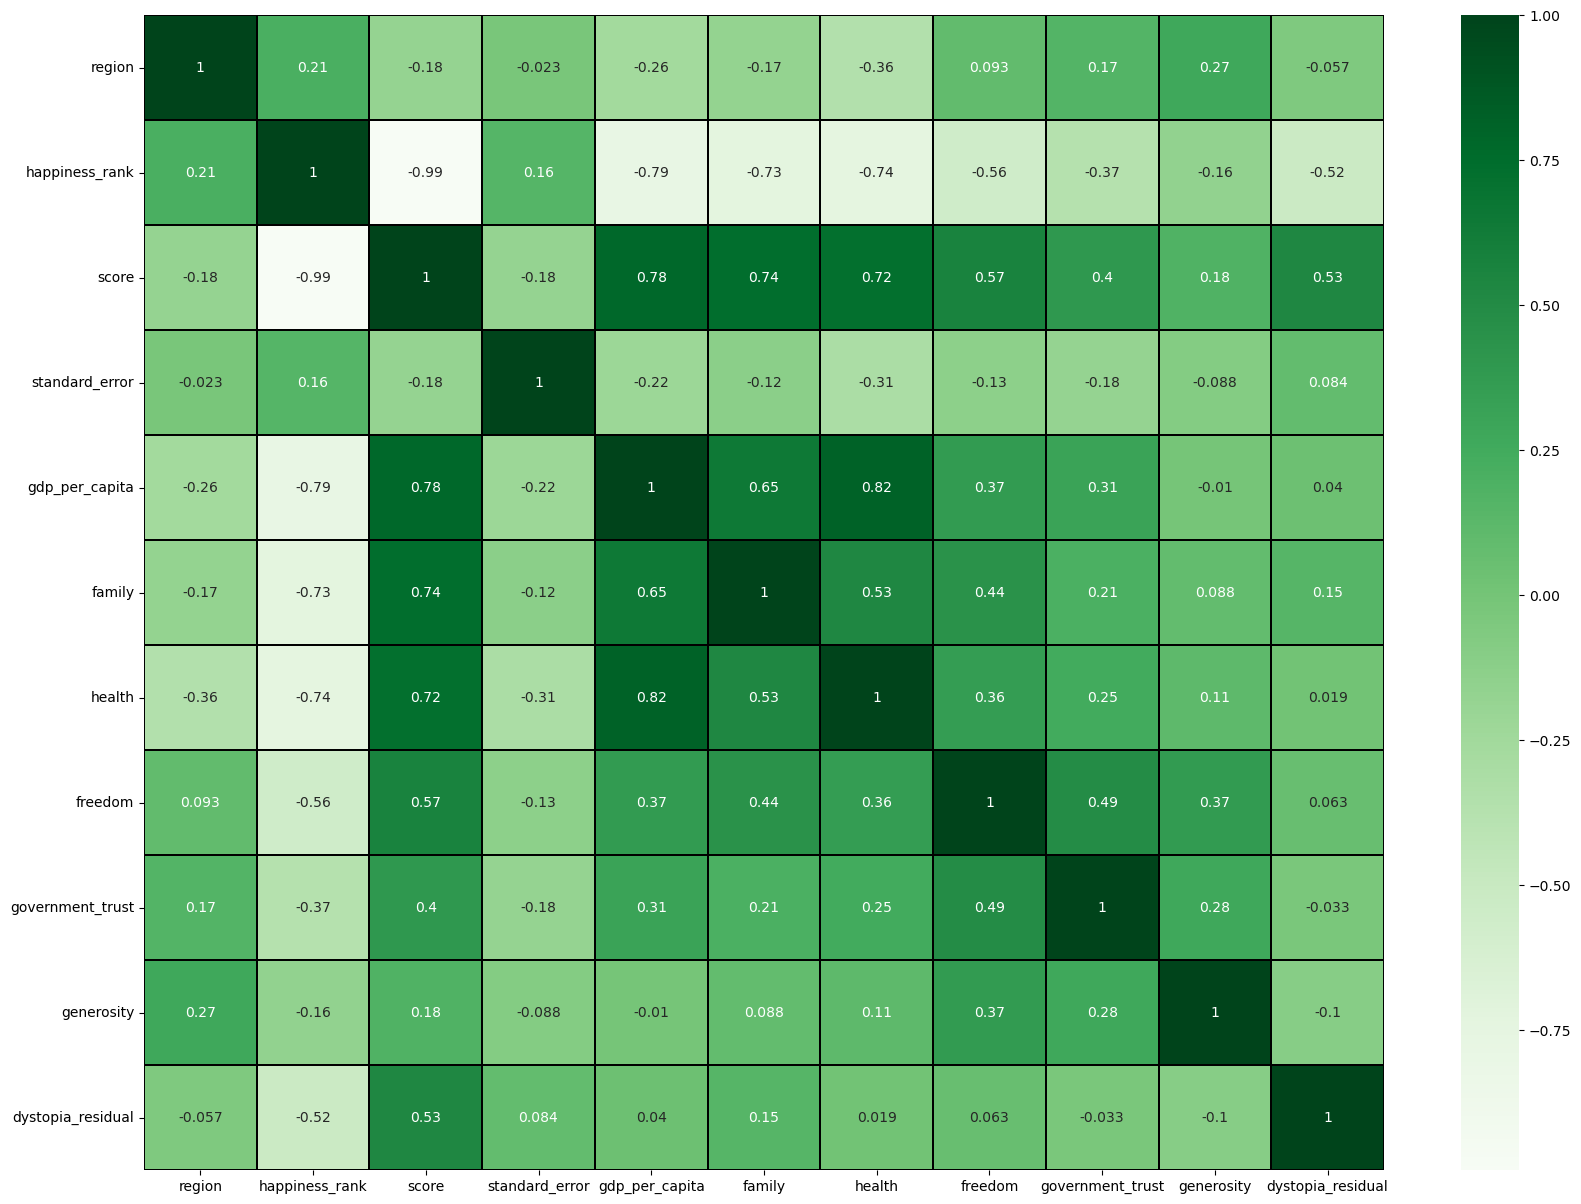

In [43]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20, 15))
sns.heatmap(df1.corr(), linewidths = 0.1, fmt = ".2g", linecolor = 'black', annot = True, cmap = 'Greens')
plt.yticks(rotation = 0)
plt.show()

# comments
1. happiness_rank has a strong negative correlation with some other features, such as score, gdp_per_capita, health,  
   family, and freedom. Maybe will be necessary to drop this column to avoid multicollinearity.
2. Notice generosity and gdp_per_capita are negatively correlated. This is surprising to see that wealthier nations tend to 
   be less generous.



To find out, how other variables relate to the score and how strongly the features are correlated to the score, we will also use a heatmap.

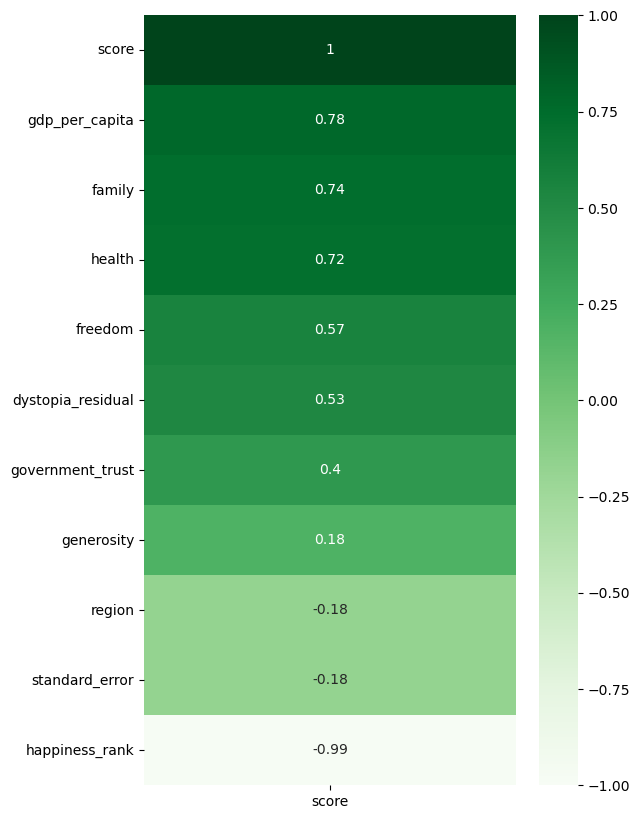

In [44]:
# Set the plot size
plt.figure(figsize=(6,10))

#create a heatmap
sns.heatmap(df1.corr()[['score']].sort_values('score', ascending=False), annot=True, cmap='Greens', vmin=-1, vmax=1);

# comments


1. In the analysis, we will consider gdp_per_capita, health, family, freedom, government_trust, and dystopia_residual 
   strong relation.
2. The columns generosity and standard_error will not be considered to train the prediction model because its weak 
   relationship with the score.



# Removing outliers
Numerical Columns, we can appreciate there are outliers in the boxplot of {standard_error, family, government_trust, generosity, dystopia_residual}.
The features generosity and standard_error are no longer consider in the analysis. Therefore, we only have to check family, government_trust, and dystopia_residual.

In [45]:
from scipy.stats import zscore

z = np.abs(zscore(df1))

df_news = df1[(z<3).all(axis=1)]

print(f"{df1.shape[0] - df_news.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df1.shape[0] - df_news.shape[0]) / df1.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_news.shape[0]} rows and {df1.shape[1]} columns.")
df = df_news
df

9 rows with outliers were deleted.
This represent 5.7% of the data.
In the new dataset there are 149 rows and 11 columns.


,region,happiness_rank,score,standard_error,gdp_per_capita,family,health,freedom,government_trust,generosity,dystopia_residual
0,9.0,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9.0,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9.0,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9.0,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5.0,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
150,8.0,151.0,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,8.0,152.0,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,7.0,153.0,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,8.0,155.0,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [46]:
df.skew()

region              -0.096985
happiness_rank       0.003268
score                0.169740
standard_error       1.243048
gdp_per_capita      -0.390657
family              -0.811340
health              -0.747711
freedom             -0.400867
government_trust     1.272530
generosity           0.654710
dystopia_residual   -0.021144
dtype: float64

# Separating Features and labels

In [47]:
x = df.drop(['score'], axis = 1)
y = df['score']

Feature Scaling using Standard Scalarization

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,region,happiness_rank,standard_error,gdp_per_capita,family,health,freedom,government_trust,generosity,dystopia_residual
0,1.296837,-1.713905,-0.866786,1.381916,1.357879,1.235390,1.583704,2.472255,0.546305,0.756876
1,1.296837,-1.691535,0.185669,1.138324,1.567882,1.261541,1.338953,0.009247,1.713898,1.109300
2,1.296837,-1.669166,-0.926089,1.198220,1.401974,0.962900,1.476027,3.036747,0.919630,0.708507
3,1.296837,-1.646796,-0.531687,1.543526,1.283947,1.006023,1.611371,1.987759,0.966495,0.657485
4,-0.026647,-1.624427,-0.765327,1.200315,1.250726,1.089333,1.366887,1.673965,1.896418,0.631620
...,...,...,...,...,...,...,...,...,...,...
144,0.965966,1.641542,0.369294,-1.026255,-0.945943,-1.985941,0.274090,0.343483,-0.249803,-1.343100
145,0.965966,1.663911,-0.214450,-1.562163,-0.624365,-1.498813,-0.216276,-0.106943,-0.117411,-1.252030
146,0.635095,1.686281,-1.100427,-1.402596,-2.811354,-1.367851,-1.285662,-0.382420,1.118051,-0.322135
147,0.965966,1.731020,-0.691734,-1.488379,-2.608163,-1.303594,0.379439,-0.533653,-0.409226,-0.930702


We have scaled the data using the Standard Scalarization method to overcome the issue of biases.

# Checking Variance Inflation Factor (VIF)

In [49]:
# Finding variance inflation factor in each scaled column 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
1,happiness_rank,86.416062
9,dystopia_residual,20.092534
3,gdp_per_capita,14.031093
5,health,9.057715
4,family,6.465276
6,freedom,3.628312
8,generosity,2.254450
7,government_trust,1.996017
0,region,1.482541
2,standard_error,1.216850


# comments
value greater than 10 could be a multicollinearity issue, like in the columns happiness_rank, dystopia_residual AND gdp_per_capita.
1. We will drop happiness_rank because is related to the score, also happiness_level has information about the level of happiness.



In [50]:
x.drop(['happiness_rank','dystopia_residual'], axis=1, inplace=True)

In [51]:
# Checking again the VIF factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
2,gdp_per_capita,4.246576
4,health,3.977773
3,family,1.910635
5,freedom,1.868759
6,government_trust,1.485366
7,generosity,1.466695
0,region,1.418465
1,standard_error,1.184480


So, we have solved multicollinearity issue. We can now move ahead fro model building.

# Modeling

# Machine Learning Algorithm

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

Creating train test split data

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.33, random_state=43)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (99, 8)
Training target vector size: (99,)
Test feature matrix size: (50, 8)
Test target vector size: (50,)


# Finding Best Random state

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.33, random_state=i)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.8951942963756501 on Random_state 176


# Linear Regression

In [55]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.33, random_state=148)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('Predicted result price:\n', y_pred)
print('\n')
print('actual price\n',Y_test)

Predicted result price:
 [4.32913071 4.97253042 5.59547584 4.45695574 6.57685884 6.07896587
 4.43625626 6.07479414 4.42489132 7.20993501 4.87914549 4.78665773
 4.66599578 4.04879542 5.11484745 4.63061845 4.66961601 6.65126061
 4.37894322 4.31034925 7.15530851 4.49419901 6.87352124 6.68977455
 4.28505098 5.57096456 5.31741606 6.3698765  5.65650671 6.4156167
 4.13934632 6.21630265 5.50374443 5.28213382 5.3037452  5.69447505
 4.50351646 5.30848465 5.20690611 3.47624835 4.77872067 4.19265489
 5.71719447 6.18910372 4.25054904 4.10605821 6.43770629 7.1632402
 4.64872539 5.12076273]


actual price
 150    3.655
61     5.759
47     5.975
137    3.995
18     6.937
26     6.670
118    4.518
24     6.786
132    4.252
8      7.286
144    3.819
109    4.686
111    4.677
136    4.033
94     4.959
141    3.904
84     5.129
25     6.750
114    4.610
138    3.989
2      7.527
117    4.550
23     6.798
12     7.200
151    3.587
63     5.716
57     5.824
54     5.848
13     7.187
38     6.295
108    4.69

# Linear Regression Evaluation Matrix

In [56]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred))

 Error :
Mean absolute error : 0.4334837226172493
Mean squared error : 0.2867207935315567
Root Mean Squared Error: 0.535463157959123


 R2 Score :
0.7971696245944585


# Applying other Regression Model

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

In [58]:
rf = RandomForestRegressor(n_estimators = 100 )
svr=SVR()
dtc = DecisionTreeRegressor()
ad=AdaBoostRegressor()

model = [rf,svr,dtc,ad]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
                                            
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('\n')

 Error of  RandomForestRegressor() :
Mean absolute error : 0.5054688
Mean squared error : 0.4007721965199999
Root Mean Squared Error: 0.633065712639691


 R2 Score :
0.7164880367725812


 Error of  SVR() :
Mean absolute error : 0.45975094791632864
Mean squared error : 0.3104200115929865
Root Mean Squared Error: 0.5571534901559771


 R2 Score :
0.7804044599999745


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.6226800000000001
Mean squared error : 0.63472448
Root Mean Squared Error: 0.796695977145611


 R2 Score :
0.550986857382153


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.5178906904941272
Mean squared error : 0.4109671254523509
Root Mean Squared Error: 0.641067177019968


 R2 Score :
0.709275998757787




# "We can see that Linear Regression Model Gives us maximum R2 Score"

# Cross Validation

In [59]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, x, y, cv = 5)
print('\033[1m'+'Cross Validation Score :'+'\033[0m\n')
print("Score :" ,score)
print("Mean Score :",score.mean())
print("Std deviation :",score.std())

Cross Validation Score :

Score : [ -8.34330865  -3.35984417  -5.82492592 -11.0201526   -5.16668994]
Mean Score : -6.742984256230519
Std deviation : 2.669396146938874


# Saving model

In [60]:
import joblib
joblib.dump(lin_reg,'lin_reg.obj')

['lin_reg.obj']

In [61]:
# Load the Model for Future Predictions
loaded_model = joblib.load('lin_reg.obj')
predictions = loaded_model.predict(X_train)
predictions

array([7.10133411, 5.53566299, 6.24846449, 4.88744526, 4.84507575,
       7.17755033, 4.96561847, 4.53166001, 6.25069984, 4.17506021,
       5.86307337, 4.21441199, 5.9073831 , 5.83307658, 5.14453163,
       6.08660056, 4.31582632, 5.22967081, 5.32673231, 5.24822196,
       4.41271537, 4.57878707, 5.25234675, 6.67255149, 3.89954998,
       5.93292875, 5.44498455, 5.72619356, 5.77167276, 5.87527549,
       5.79850618, 6.90488952, 6.35007749, 3.66703363, 4.84464959,
       3.66026773, 5.70917097, 4.36149074, 4.72011693, 5.94631657,
       4.78767056, 5.85389875, 5.27555503, 5.88562024, 5.63680033,
       5.67592676, 6.60424899, 5.22578854, 4.95601228, 3.77404222,
       5.69092128, 4.67028118, 3.53953022, 4.16024568, 6.43223854,
       6.44396678, 5.98120022, 6.86265839, 4.95312468, 5.00545468,
       7.01263309, 4.5345909 , 4.82319047, 5.23128276, 3.90865521,
       5.87874178, 6.917375  , 5.36566715, 5.9173958 , 5.4289092 ,
       4.55501477, 4.15739695, 5.91758242, 3.1595591 , 7.06381

----------------------------------------------------------Thanks----------------------------------------------------------